In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Hyper Parameters
class Config:
    input_size = 784
    hidden_size = 20
    num_layers = 2
    num_classes = 10
    num_epochs = 15
    batch_size = 100
    learning_rate = 0.001
hyper_param = Config()

In [3]:
# MNIST Dataset 
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=hyper_param.batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=hyper_param.batch_size, 
                                          shuffle=False)

In [37]:
# Neural Network Model
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(Net, self).__init__()
        self.model = nn.Sequential()
        
        # first layer
        self.model.add_module('fc1', nn.Linear(input_size, hidden_size))
        self.model.add_module('tanh1', nn.Tanh())
        
        # intermediate layers
        if num_layers > 1:
            for i in range(num_layers-1):
                self.model.add_module('fc'+str(i+2), nn.Linear(hidden_size, hidden_size))
                self.model.add_module('tanh'+str(i+2), nn.Tanh())
        
        # last layer
        self.model.add_module('fc_last', nn.Linear(hidden_size, num_classes))
    
    def forward(self, x):
        return self.model(x)

In [5]:
# Custom weights initialization
def weights_init(m):
    if isinstance(m, nn.Linear):
        m.weight.data.normal_(0.0, 0.01)
        #xavier(m.weight.data)
        #xavier(m.bias.data)

In [38]:
net = Net(hyper_param.input_size, hyper_param.hidden_size, hyper_param.num_layers, hyper_param.num_classes)
# net.apply(weights_init)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = hyper_param.learning_rate)

In [39]:
net

Net (
  (model): Sequential (
    (fc1): Linear (784 -> 20)
    (tanh1): Tanh ()
    (fc2): Linear (20 -> 20)
    (tanh2): Tanh ()
    (fc_last): Linear (20 -> 10)
  )
)

In [40]:
# Train the Model
loss_conv = []
for epoch in range(hyper_param.num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            loss_conv.append(loss.data[0])
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, hyper_param.num_epochs, i+1, len(train_dataset)//hyper_param.batch_size, loss.data[0]))

Epoch [1/15], Step [100/600], Loss: 1.1163
Epoch [1/15], Step [200/600], Loss: 0.5567
Epoch [1/15], Step [300/600], Loss: 0.6276
Epoch [1/15], Step [400/600], Loss: 0.5911
Epoch [1/15], Step [500/600], Loss: 0.3644
Epoch [1/15], Step [600/600], Loss: 0.2772
Epoch [2/15], Step [100/600], Loss: 0.3488
Epoch [2/15], Step [200/600], Loss: 0.2924
Epoch [2/15], Step [300/600], Loss: 0.3279
Epoch [2/15], Step [400/600], Loss: 0.2219
Epoch [2/15], Step [500/600], Loss: 0.1887
Epoch [2/15], Step [600/600], Loss: 0.2623
Epoch [3/15], Step [100/600], Loss: 0.1847
Epoch [3/15], Step [200/600], Loss: 0.2792
Epoch [3/15], Step [300/600], Loss: 0.3734
Epoch [3/15], Step [400/600], Loss: 0.1783
Epoch [3/15], Step [500/600], Loss: 0.0760
Epoch [3/15], Step [600/600], Loss: 0.2132
Epoch [4/15], Step [100/600], Loss: 0.2193
Epoch [4/15], Step [200/600], Loss: 0.1747
Epoch [4/15], Step [300/600], Loss: 0.2502
Epoch [4/15], Step [400/600], Loss: 0.2118
Epoch [4/15], Step [500/600], Loss: 0.1848
Epoch [4/15

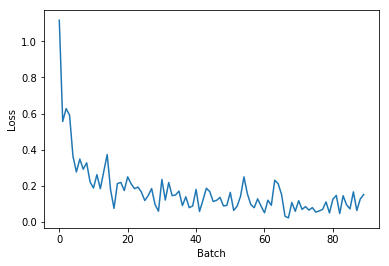

In [41]:
plt.plot(loss_conv)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.show()

In [42]:
# Train error of the Model
correct = 0
total = 0
for images, labels in train_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 60000 train images: %f %%' % (100. * correct / total))

Accuracy of the network on the 60000 train images: 97.533333 %


In [43]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)4
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %f %%' % (100. * correct / total))

Accuracy of the network on the 10000 test images: 95.550000 %


In [44]:
parameters = []
for param in net.parameters():
    parameters.append(param.data.numpy())

In [47]:
for idx, item in enumerate(parameters[:-2]):
    if idx%2 == 0:
        layer_param = parameters[idx].reshape(784,500) if idx == 0 else \
            parameters[idx].reshape(500,500)
        print "hidden layer %d had mean %f and std %f" % (idx/2+1, \
            np.mean(layer_param), np.std(layer_param))

ValueError: cannot reshape array of size 15680 into shape (784,500)

In [49]:
for idx, item in enumerate(parameters[:-1]):
    if idx%2 == 1:
        layer_param = parameters[idx].reshape(20)
        print "hidden layer %d had mean %f and std %f" % (idx/2+1, \
            np.mean(layer_param), np.std(layer_param))

hidden layer 1 had mean -0.009493 and std 0.153664
hidden layer 2 had mean 0.063089 and std 0.406213


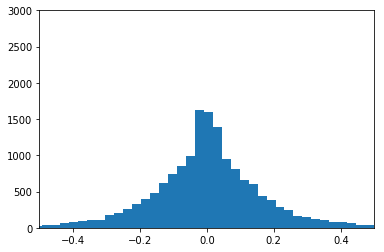

In [52]:
plt.hist(parameters[0].reshape(784*20), bins=100)
plt.axis([-0.5, 0.5, 0, 3000])
plt.show()

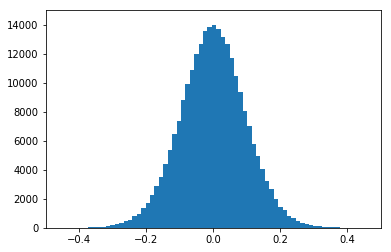

In [21]:
plt.hist(parameters[2].reshape(500*500), bins=100)
plt.axis([-0.5, 0.5, 0, 15000])
plt.show()

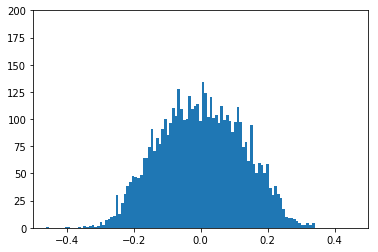

In [30]:
plt.hist(parameters[4].reshape(500*10), bins=100)
plt.axis([-0.5, 0.5, 0, 200])
plt.show()

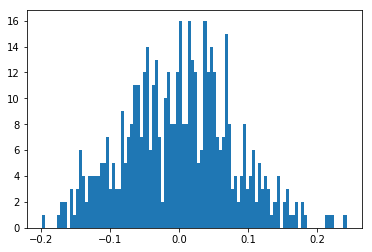

In [35]:
plt.hist(parameters[1].reshape(500), bins=100)
# plt.axis([-1., 1., 0, 15000])
plt.show()

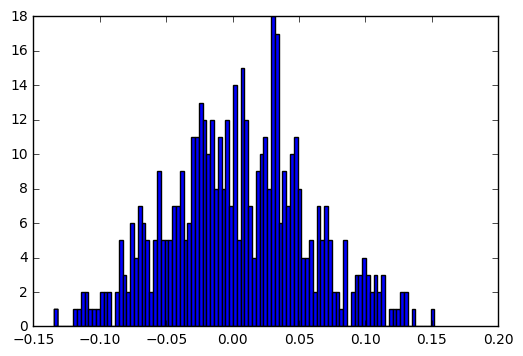

In [20]:
plt.hist(parameters[9].reshape(500), bins=100)
# plt.axis([-1., 1., 0, 15000])
plt.show()

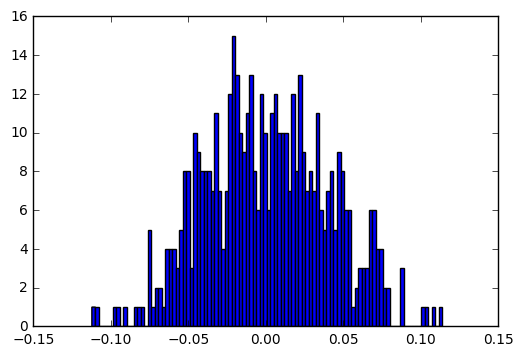

In [21]:
plt.hist(parameters[17].reshape(500), bins=100)
# plt.axis([-1., 1., 0, 15000])
plt.show()